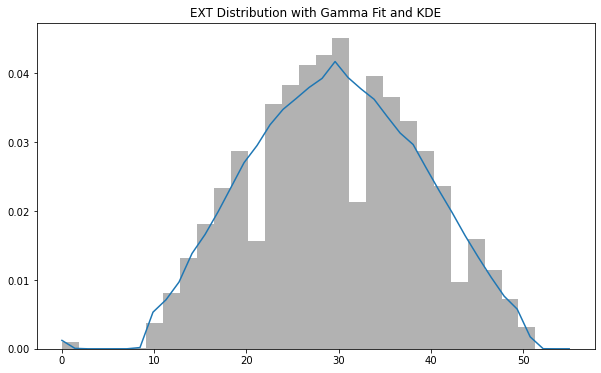

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, gaussian_kde
from scipy.optimize import curve_fit

# 读取数据
df = pd.read_csv('处理后的性格数据_修正版.csv')

# 定义Gamma分布的拟合函数
def gamma_pdf(x, a, loc, scale):
    return gamma.pdf(x, a=a, scale=scale, loc=loc)

# 选择EXT列进行拟合
data = df['EXT'].dropna()  # 确保没有NaN值

# 选择初始参数
initial_params = [2, data.min(), 1]  # a=2, loc=最小值, scale=1


# 创建核密度估计对象
kde = gaussian_kde(data)

# 绘制直方图和拟合曲线
plt.figure(figsize=(10, 6))

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray')

# 绘制核密度估计图
x_kde = np.linspace(data.min(), data.max(), 40)
kde_values = kde.evaluate(x_kde)
plt.plot(x_kde, kde_values, label='KDE')

# 添加图例和标题
# plt.legend()
plt.title('EXT Distribution with Gamma Fit and KDE')

# 显示图表
plt.show()

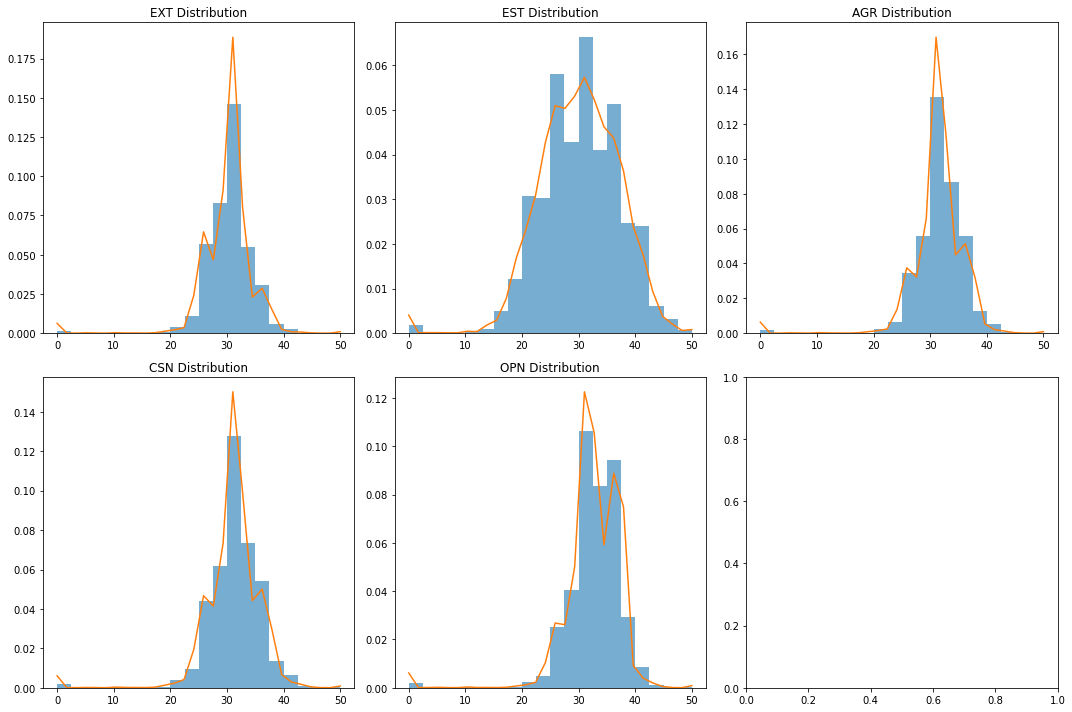

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, gaussian_kde
from scipy.optimize import curve_fit

# 读取数据
df = pd.read_csv('处理后的性格数据.csv')

# 定义Gamma分布的拟合函数
def gamma_pdf(x, a, loc, scale):
    return gamma.pdf(x, a=a, scale=scale, loc=loc)

# 指标名称列表
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']

# 创建2x3的子图网格
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 遍历指标并绘制每个指标的分布图
for i, trait in enumerate(traits):
    ax = axs[i//3][i%3]  # 根据索引选择子图
    data = df[trait].dropna()  # 确保没有NaN值
    
    # 选择初始参数
    initial_params = [2, data.min(), 1]  # a=2, loc=最小值, scale=1
    
    # 创建核密度估计对象
    kde = gaussian_kde(data)
    
    # 绘制直方图
    ax.hist(data, bins=20, density=True, alpha=0.6)
    
    # 绘制核密度估计图
    x_kde = np.linspace(data.min(), data.max(), 30)
    kde_values = kde.evaluate(x_kde)
    ax.plot(x_kde, kde_values, label='KDE')
    
    # 添加图例和标题
    # ax.legend()
    ax.set_title(f'{trait} Distribution')

# 调整子图间距
plt.tight_layout()
plt.savefig("大五人格分布.jpg",dpi=600)

# 显示图表
plt.show()